In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import silhouette_score


In [2]:
# Load the excel file(s) 
data = pd.read_csv('long_lat2.csv')
data.head()

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,id,outcode,latitude,longitude
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,...,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000,766,DY6,52.496759,-2.173682
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,...,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025,1934,OX18,51.767526,-1.582311
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,...,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323,597,CV5,52.424186,-1.562449
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,...,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439,2915,WS15,52.765303,-1.911238
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,...,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524,1664,MK1,52.006042,-0.726102


In [3]:
data['outward_code_x'].nunique()
data['OrderID'].nunique()

4119

<Axes: xlabel='longitude', ylabel='latitude'>

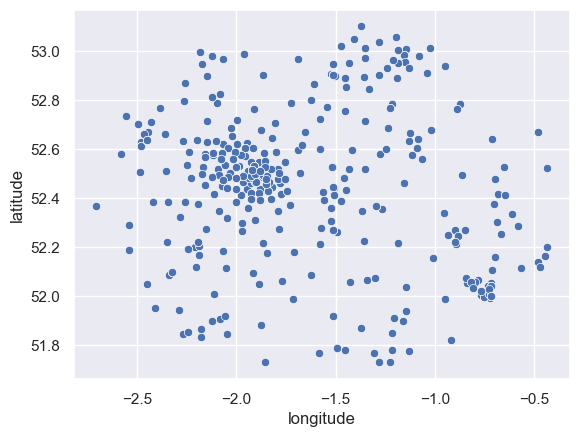

In [4]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='longitude',
                y='latitude',
                data=data)


In [5]:
# Create a pairplot with Seaborn.
x = data[['longitude', 'latitude','id','OrderID']]
x

,longitude,latitude,id,OrderID
0,-2.173682,52.496759,766,2295440
1,-1.582311,51.767526,1934,2292996
2,-1.562449,52.424186,597,2285048
3,-1.911238,52.765303,2915,2297608
4,-0.726102,52.006042,1664,2281052
...,...,...,...,...
4114,-1.213406,52.964498,1820,2286675
4115,-0.566550,52.115500,1681,2299291
4116,-2.242429,51.853212,1009,2286559
4117,-1.187850,52.217508,1826,2288157


In [6]:
a = x[['longitude','latitude']]

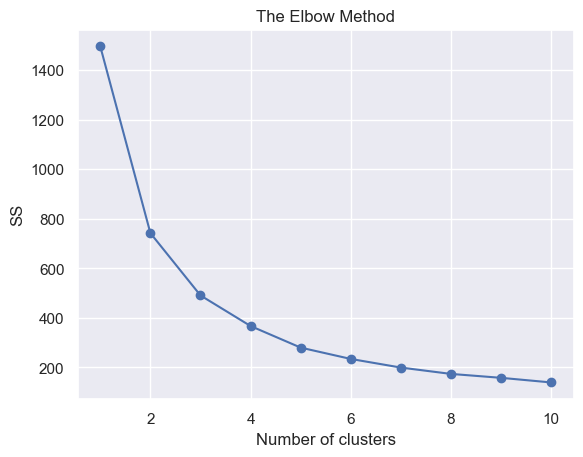

In [7]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(a)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")
plt.show()

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

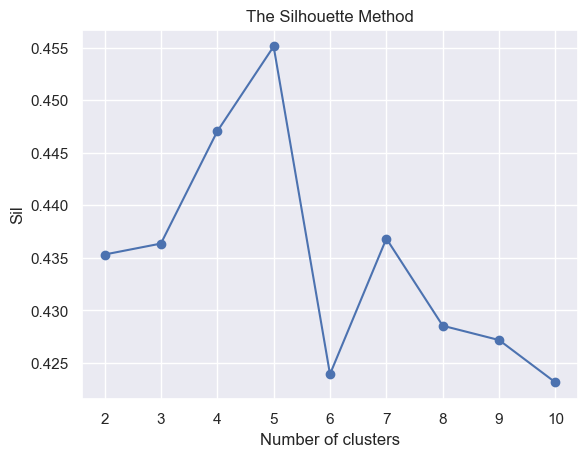

In [8]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10


for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(a)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(a,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## Elbow method indicates 4 clusters
## Silhouette Method indicates 5 clusters

**4 CLUSTERS**

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_23164\3747191018.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['K-Means Predicted'] = clusters4


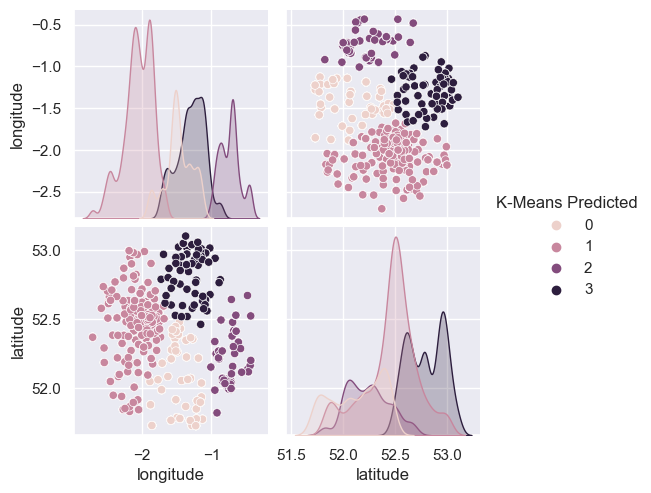

In [9]:
# Use 4 clusters:
kmeans1 = KMeans(n_clusters = 4,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(a)

clusters4 = kmeans1.labels_
a['K-Means Predicted'] = clusters4

# Plot the predicted.
sns.pairplot(a,
             hue='K-Means Predicted',
             diag_kind= 'kde')

Text(0.5, 1.0, 'Clusters based on Langitude & Latitude - 4 clusters')

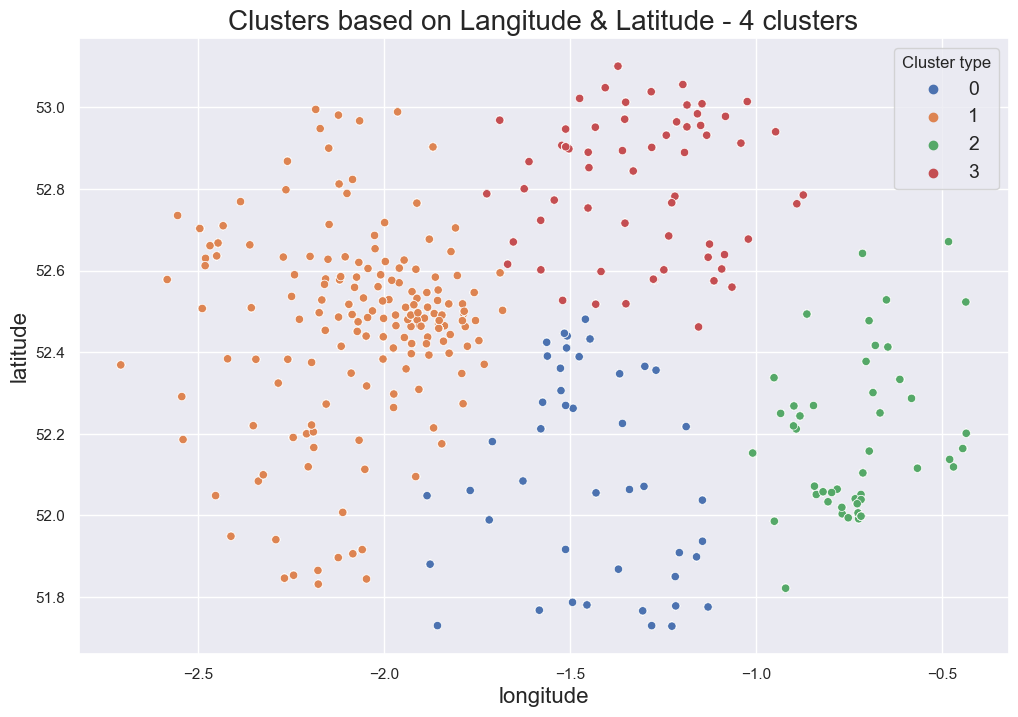

In [10]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='longitude', 
                y ='latitude',
                data=a ,
                hue='K-Means Predicted',palette="deep")
plt.legend(title='Cluster type', fontsize=14)
plt.xlabel('longitude', fontsize=16);
plt.ylabel('latitude', fontsize=16);
plt.title('Clusters based on Langitude & Latitude - 4 clusters', fontsize=20)

In [11]:
# Labels of each point
x['cluster4_label'] = kmeans1.fit_predict(a[a.columns[1:5]])

x.head()

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_23164\4082038005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster4_label'] = kmeans1.fit_predict(a[a.columns[1:5]])


,longitude,latitude,id,OrderID,cluster4_label
0,-2.173682,52.496759,766,2295440,3
1,-1.582311,51.767526,1934,2292996,2
2,-1.562449,52.424186,597,2285048,2
3,-1.911238,52.765303,2915,2297608,3
4,-0.726102,52.006042,1664,2281052,0


In [12]:
# Sense Check
x['cluster4_label'].count()

4119

In [13]:
# Merge data to to include cluster label
cluster4_data = pd.merge(data,x,on='OrderID' ,how='left')
cluster4_data

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,Volume_per_line_m3,Pallet_per_line,id_x,outcode,latitude_x,longitude_x,longitude_y,latitude_y,id_y,cluster4_label
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,...,0.225000,0.200000,766,DY6,52.496759,-2.173682,-2.173682,52.496759,766,3
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,...,0.219678,0.200025,1934,OX18,51.767526,-1.582311,-1.582311,51.767526,1934,2
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,...,0.044060,0.044323,597,CV5,52.424186,-1.562449,-1.562449,52.424186,597,2
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,...,0.053674,0.028439,2915,WS15,52.765303,-1.911238,-1.911238,52.765303,2915,3
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,...,0.090629,0.059524,1664,MK1,52.006042,-0.726102,-0.726102,52.006042,1664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4114,NG8,Midlands,42.25,2286675,847974,2023-04-06 14:29:14.100,Dispatched,Payment Gateway,DX Freight,...,1.250000,1.250000,1820,NG8,52.964498,-1.213406,-1.213406,52.964498,1820,1
4115,4115,MK43,Midlands,46.14,2299291,848793,2023-04-21 17:10:04.240,Dispatched,Payment Gateway,DX Express,...,0.019250,0.061473,1681,MK43,52.115500,-0.566550,-0.566550,52.115500,1681,0
4116,4116,GL1,Midlands,47.05,2286559,851414,2023-04-06 13:29:21.527,Dispatched,Payment Gateway,DX Express,...,0.140650,0.082143,1009,GL1,51.853212,-2.242429,-2.242429,51.853212,1009,3
4117,4117,NN11,Midlands,19.77,2288157,858296,2023-04-11 11:41:11.387,Dispatched,Paypal,DX Freight,...,0.144000,0.100000,1826,NN11,52.217508,-1.187850,-1.187850,52.217508,1826,2


In [14]:
# Drop irrelevant columns
cluster4_data.drop(columns=['Unnamed: 0','id_x','latitude_x','longitude_x','id_y',
                            'outcode', 'latitude_y','longitude_y'],inplace=True)


In [15]:
# View DataFrame
cluster4_data

,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,cluster4_label
0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000,3
1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025,2
2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323,2
3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439,3
4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,NG8,Midlands,42.25,2286675,847974,2023-04-06 14:29:14.100,Dispatched,Payment Gateway,DX Freight,120.50,0.00,2023-04-06,11.36,United Kingdom,21.00,1.250000,1.250000,1
4115,MK43,Midlands,46.14,2299291,848793,2023-04-21 17:10:04.240,Dispatched,Payment Gateway,DX Express,57.78,7.17,2023-04-24,6.76,United Kingdom,7.20,0.019250,0.061473,0
4116,GL1,Midlands,47.05,2286559,851414,2023-04-06 13:29:21.527,Dispatched,Payment Gateway,DX Express,42.42,7.20,2023-04-06,6.79,United Kingdom,13.14,0.140650,0.082143,3
4117,NN11,Midlands,19.77,2288157,858296,2023-04-11 11:41:11.387,Dispatched,Paypal,DX Freight,31.44,12.23,2023-04-11,10.92,United Kingdom,13.20,0.144000,0.100000,2


**5 CLUSTERS**

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_23164\111323446.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['K-Means Predicted'] = clusters5


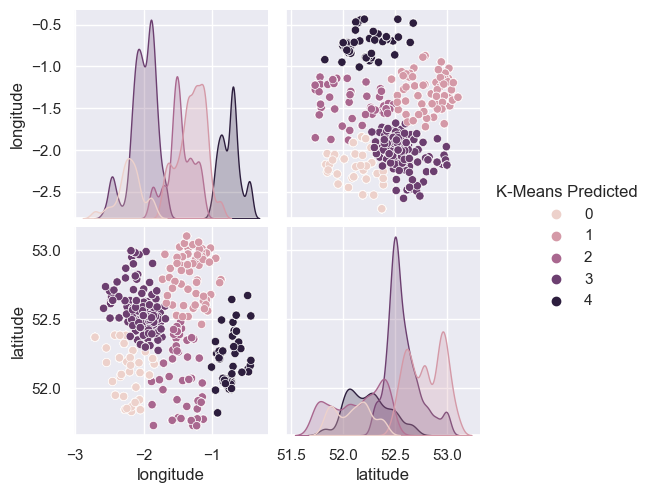

In [16]:
# Use 5 clusters:
kmeans2 = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(a)

clusters5 = kmeans2.labels_
a['K-Means Predicted'] = clusters5

# Plot the predicted.
sns.pairplot(a,
             hue='K-Means Predicted',
             diag_kind= 'kde')

Text(0.5, 1.0, 'Clusters based on Langitude & Latitude - 5 clusters')

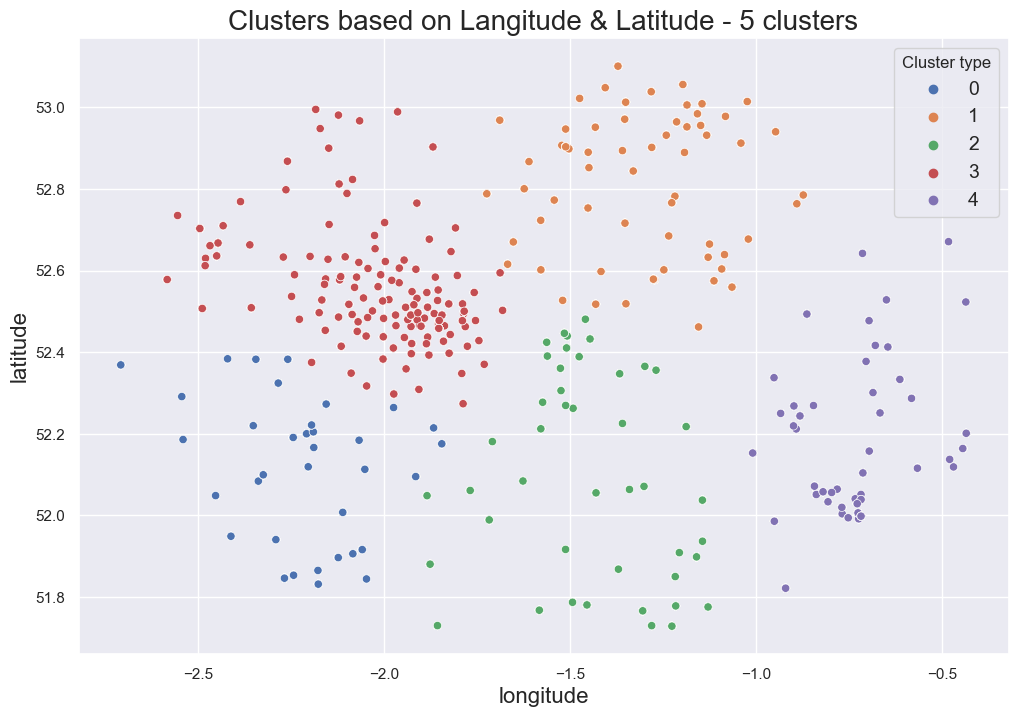

In [17]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='longitude', 
                y ='latitude',
                data=a ,
                hue='K-Means Predicted',palette="deep")
plt.legend(title='Cluster type', fontsize=14)
plt.xlabel('longitude', fontsize=16);
plt.ylabel('latitude', fontsize=16);
plt.title('Clusters based on Langitude & Latitude - 5 clusters', fontsize=20)

In [18]:
# Labels of each point
x['cluster5_label'] = kmeans2.fit_predict(a[a.columns[1:5]])

x.head()

C:\Users\christina.hudaja\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_23164\4050732956.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster5_label'] = kmeans2.fit_predict(a[a.columns[1:5]])


,longitude,latitude,id,OrderID,cluster4_label,cluster5_label
0,-2.173682,52.496759,766,2295440,3,1
1,-1.582311,51.767526,1934,2292996,2,3
2,-1.562449,52.424186,597,2285048,2,3
3,-1.911238,52.765303,2915,2297608,3,1
4,-0.726102,52.006042,1664,2281052,0,4


In [19]:
# Sense Check
x['cluster5_label'].count()

4119

In [20]:
# Merge data to to include cluster label
cluster5_data = pd.merge(data,x,on='OrderID' ,how='left')
cluster5_data

,Unnamed: 0,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,...,Pallet_per_line,id_x,outcode,latitude_x,longitude_x,longitude_y,latitude_y,id_y,cluster4_label,cluster5_label
0,0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,...,0.200000,766,DY6,52.496759,-2.173682,-2.173682,52.496759,766,3,1
1,1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,...,0.200025,1934,OX18,51.767526,-1.582311,-1.582311,51.767526,1934,2,3
2,2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,...,0.044323,597,CV5,52.424186,-1.562449,-1.562449,52.424186,597,2,3
3,3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,...,0.028439,2915,WS15,52.765303,-1.911238,-1.911238,52.765303,2915,3,1
4,4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,...,0.059524,1664,MK1,52.006042,-0.726102,-0.726102,52.006042,1664,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,4114,NG8,Midlands,42.25,2286675,847974,2023-04-06 14:29:14.100,Dispatched,Payment Gateway,DX Freight,...,1.250000,1820,NG8,52.964498,-1.213406,-1.213406,52.964498,1820,1,2
4115,4115,MK43,Midlands,46.14,2299291,848793,2023-04-21 17:10:04.240,Dispatched,Payment Gateway,DX Express,...,0.061473,1681,MK43,52.115500,-0.566550,-0.566550,52.115500,1681,0,4
4116,4116,GL1,Midlands,47.05,2286559,851414,2023-04-06 13:29:21.527,Dispatched,Payment Gateway,DX Express,...,0.082143,1009,GL1,51.853212,-2.242429,-2.242429,51.853212,1009,3,0
4117,4117,NN11,Midlands,19.77,2288157,858296,2023-04-11 11:41:11.387,Dispatched,Paypal,DX Freight,...,0.100000,1826,NN11,52.217508,-1.187850,-1.187850,52.217508,1826,2,3


In [21]:
# Drop irrelevant columns
cluster5_data.drop(columns=['Unnamed: 0','id_x','latitude_x','longitude_x','id_y',
                            'outcode', 'latitude_y','longitude_y','cluster4_label'],inplace=True)


In [22]:
# View DataFrame
cluster5_data

,outward_code_x,dist_centres,distance,OrderID,WebsiteID,OrderDate,Status,PaymentOption,Courier,ProductsExVAT,DeliveryExVAT,DateDespatched,DeliveryCost,country,Weight_per_line,Volume_per_line_m3,Pallet_per_line,cluster5_label
0,DY6,Midlands,26.84,2295440,7700,2023-04-18 15:16:50.030,Dispatched,On Account,MFS,375.40,0.00,2023-04-18,34.46,United Kingdom,110.00,0.225000,0.200000,1
1,OX18,Midlands,43.04,2292996,9759,2023-04-16 20:47:47.493,Dispatched,Payment Gateway,DX Freight,148.41,0.00,2023-04-17,14.77,United Kingdom,29.24,0.219678,0.200025,3
2,CV5,Midlands,2.34,2285048,13038,2023-04-05 10:58:30.303,Dispatched,Payment Gateway,DX Freight,170.94,0.00,2023-04-05,14.45,United Kingdom,28.50,0.044060,0.044323,3
3,WS15,Midlands,29.80,2297608,15160,2023-04-20 11:31:32.320,Dispatched,On Account,DX Express,42.26,7.17,2023-04-20,6.76,United Kingdom,8.56,0.053674,0.028439,1
4,MK1,Midlands,44.21,2281052,16152,2023-03-31 14:07:41.883,Dispatched,On Account,DX Freight,124.36,0.00,2023-03-31,22.28,United Kingdom,48.74,0.090629,0.059524,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,NG8,Midlands,42.25,2286675,847974,2023-04-06 14:29:14.100,Dispatched,Payment Gateway,DX Freight,120.50,0.00,2023-04-06,11.36,United Kingdom,21.00,1.250000,1.250000,2
4115,MK43,Midlands,46.14,2299291,848793,2023-04-21 17:10:04.240,Dispatched,Payment Gateway,DX Express,57.78,7.17,2023-04-24,6.76,United Kingdom,7.20,0.019250,0.061473,4
4116,GL1,Midlands,47.05,2286559,851414,2023-04-06 13:29:21.527,Dispatched,Payment Gateway,DX Express,42.42,7.20,2023-04-06,6.79,United Kingdom,13.14,0.140650,0.082143,0
4117,NN11,Midlands,19.77,2288157,858296,2023-04-11 11:41:11.387,Dispatched,Paypal,DX Freight,31.44,12.23,2023-04-11,10.92,United Kingdom,13.20,0.144000,0.100000,3


In [23]:
cluster5_data.to_csv('cluster5.csv')

## Calculating average daily dimension per cluster

In [38]:
daily_dimension = cluster5_data.groupby(['DateDespatched',
                       'cluster5_label'],as_index=False)['Weight_per_line',
                                                         'Volume_per_line_m3',
                                                         'Pallet_per_line','DeliveryCost'].sum()
daily_dimension

C:\Users\christina.hudaja\AppData\Local\Temp\ipykernel_23164\3228334434.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_dimension = cluster5_data.groupby(['DateDespatched',


,DateDespatched,cluster5_label,Weight_per_line,Volume_per_line_m3,Pallet_per_line,DeliveryCost
0,2023-03-27,0,974.27,7.780666,5.079077,400.28
1,2023-03-27,1,6431.83,64.510685,39.597842,1722.23
2,2023-03-27,2,4779.39,46.602082,26.647428,1505.35
3,2023-03-27,3,2062.89,19.028469,12.346077,726.91
4,2023-03-27,4,1802.76,24.574885,15.977732,738.44
...,...,...,...,...,...,...
94,2023-04-24,0,378.46,0.962520,0.877166,109.92
95,2023-04-24,1,1264.32,5.046003,5.424968,297.12
96,2023-04-24,2,206.69,3.016937,1.551981,128.57
97,2023-04-24,3,184.99,0.976875,0.906555,103.87


In [45]:
cluster0_dimension =daily_dimension[daily_dimension['cluster5_label'] == 0]
cluster0_dimension.describe()

,cluster5_label,Weight_per_line,Volume_per_line_m3,Pallet_per_line,DeliveryCost
count,19.0,19.000000,19.000000,19.000000,19.000000
mean,0.0,1470.465789,13.443892,9.037937,470.174737
std,0.0,652.186858,6.292121,4.069326,171.913604
min,0.0,378.460000,0.962520,0.877166,109.920000
25%,0.0,987.240000,9.508448,6.588478,374.140000
50%,0.0,1491.240000,12.565899,8.815876,438.610000
75%,0.0,1928.325000,16.350196,11.124564,545.025000
max,0.0,2542.480000,25.879257,16.789689,828.840000


In [46]:
cluster1_dimension =daily_dimension[daily_dimension['cluster5_label'] == 1]
cluster1_dimension.describe()

,cluster5_label,Weight_per_line,Volume_per_line_m3,Pallet_per_line,DeliveryCost
count,21.0,21.000000,21.000000,21.000000,21.000000
mean,1.0,6192.076667,56.162338,35.807144,1664.492857
std,0.0,3319.087134,29.833866,18.916640,790.993366
min,1.0,83.730000,0.387060,0.376181,35.720000
25%,1.0,4842.700000,43.307321,28.742221,1437.400000
50%,1.0,6248.550000,58.387123,35.723441,1664.390000
75%,1.0,7542.760000,67.342921,42.033145,2053.600000
max,1.0,13277.410000,105.513208,66.065803,3095.480000


In [47]:
cluster2_dimension =daily_dimension[daily_dimension['cluster5_label'] == 2]
cluster2_dimension.describe()

,cluster5_label,Weight_per_line,Volume_per_line_m3,Pallet_per_line,DeliveryCost
count,20.0,20.000000,20.000000,20.000000,20.000000
mean,2.0,4853.508500,41.706367,27.711778,1408.808000
std,0.0,2369.896903,19.656503,12.342051,555.705352
min,2.0,206.690000,2.926100,1.551981,115.880000
25%,2.0,4272.275000,31.966391,23.830460,1327.245000
50%,2.0,4942.455000,43.600221,28.197977,1504.765000
75%,2.0,5574.655000,51.149010,32.465840,1685.237500
max,2.0,11095.310000,92.315474,60.235134,2548.230000


In [48]:
cluster3_dimension =daily_dimension[daily_dimension['cluster5_label'] == 3]
cluster3_dimension.describe()

,cluster5_label,Weight_per_line,Volume_per_line_m3,Pallet_per_line,DeliveryCost
count,19.0,19.000000,19.000000,19.000000,19.000000
mean,3.0,2978.584211,31.223191,21.177205,966.664211
std,0.0,1395.960496,15.095258,8.997195,364.825227
min,3.0,184.990000,0.976875,0.906555,103.870000
25%,3.0,2287.495000,22.562837,15.551111,754.565000
50%,3.0,2912.870000,31.735848,21.346279,1022.520000
75%,3.0,3745.430000,39.846901,26.814301,1158.740000
max,3.0,6187.420000,64.628139,37.246026,1720.240000


In [49]:
cluster4_dimension =daily_dimension[daily_dimension['cluster5_label'] == 4]
cluster4_dimension.describe()

,cluster5_label,Weight_per_line,Volume_per_line_m3,Pallet_per_line,DeliveryCost
count,20.0,20.000000,20.000000,20.000000,20.000000
mean,4.0,2218.327500,25.082365,15.892350,737.630000
std,0.0,1230.768218,11.959338,7.236070,319.592843
min,4.0,22.160000,0.081014,0.139856,13.520000
25%,4.0,1566.100000,19.593562,12.145654,580.212500
50%,4.0,2142.130000,24.639093,16.473354,788.895000
75%,4.0,2857.442500,30.369019,19.056241,935.540000
max,4.0,4985.420000,44.890195,27.699390,1288.780000
